# "The Wine Land" and Recommedation system for wine variety

* As the name suggests, the online store specializes in selling different varieties of wines.
* Wines and its allied activities are niches. Having said that, the online store receives a decent amount of traffic and reviews from its users.


The Data Description is as follows -
* user_name - user_name of the reviewer
* country -The country that the wine is from.
* review_title - The title of the wine review, which often contains the vintage.
* review_description - A verbose review of the wine.
* designation - The vineyard within the winery where the grapes that made the wine are from.
* points - ratings given by the user. The ratings are between 0 -100.
* price - The cost for a bottle of the wine
* province - The province or state that the wine is from.
* region_1 - The wine-growing area in a province or state (ie Napa).
* region_2 - Sometimes there are more specific regions specified within awine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
* winery - The winery that made the wine
* variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment.

Project flow is as follows:
* Importing Libraries
* Reading dataset
* Missing values in dataset
* Various valueable insights with graphs and comments.
* At the end a 'Wine Recommendation system' with Random choice and custom choice of wine variety

In [2]:
!pip install wordcloud

In [4]:
!pip install missingno

In [2]:
!pip install squarify

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

The last three imports are related to dimensionality reduction techniques. The %matplotlib inline magic command ensures that plots are displayed directly in the Jupyter Notebook or JupyterLab interface.

In [3]:
wine= pd.read_csv('OSX_DS_assignment.csv')

In [4]:
wine.shape

(103322, 12)

In [5]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [6]:
# Returns summary of descriptive statistics of numeric and non-numeric columns, T is for tranpose.
wine.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_name,79191,15,@vossroger,21971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,103283,40,US,48153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_title,103322,94482,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_description,103322,95434,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,73686,30309,Reserve,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,103322,NaN,NaN,NaN,88.5406,3.0909,80,86,88,91,100
price,96359,NaN,NaN,NaN,36.7812,42.8671,4,18,27,45,3300
province,103283,370,California,32061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,87254,1056,Napa Valley,4158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,44863,17,Central Coast,9347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

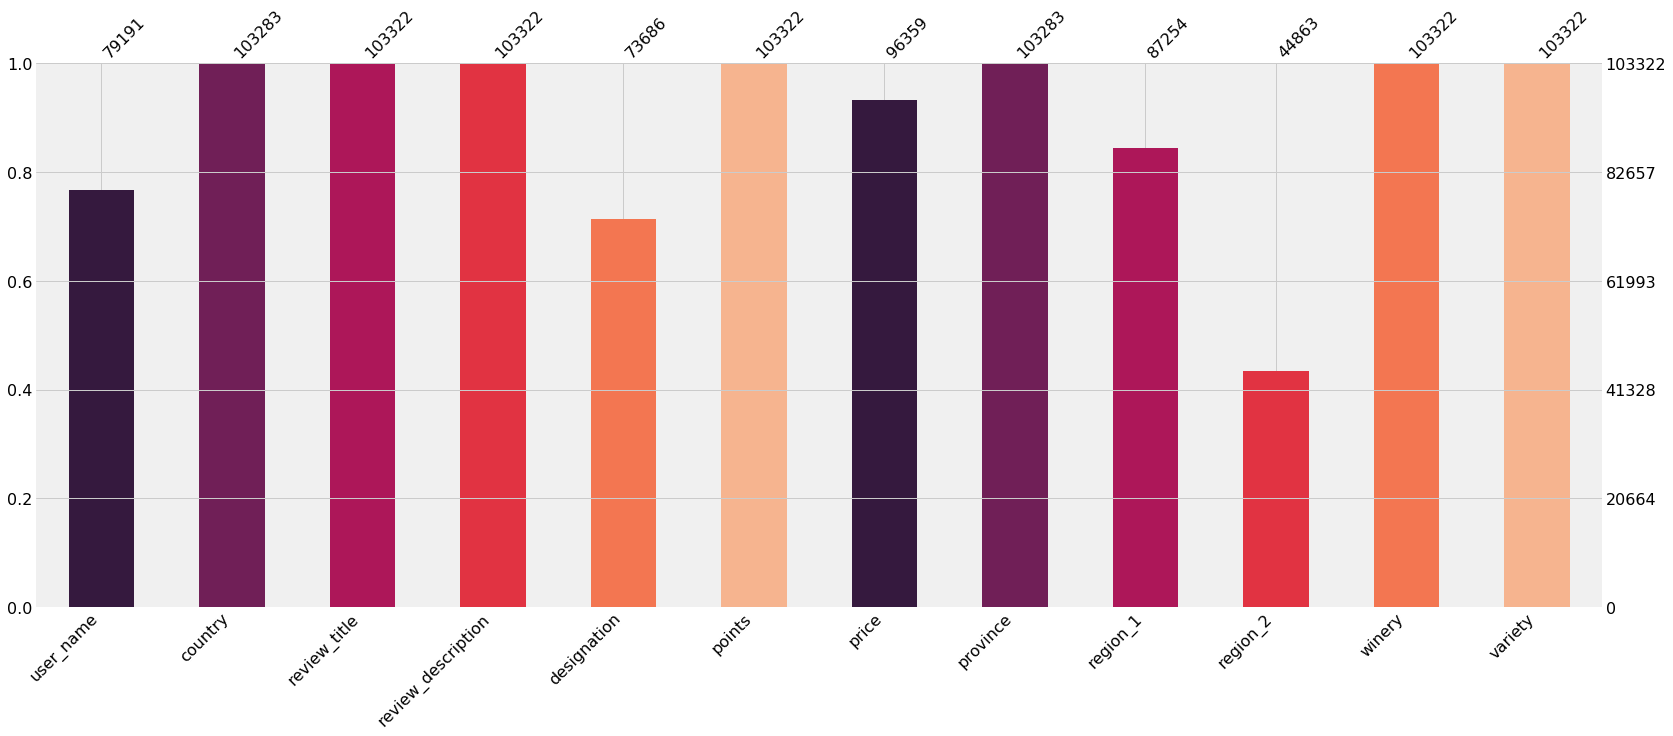

In [8]:
# The missingno module provides a convenient way to visualize missing data patterns.
msno.bar(wine,color= sns.color_palette('rocket'))

* Above bar graph shows that, features like user_name, Designtion and region_2 has some serious missing values. 
* Also a closer look reveals features like country and province has 39 missing values each.
* Features like price and region_1 has 6963 and 16068 missing values respectively.

Number of country list in data: 40


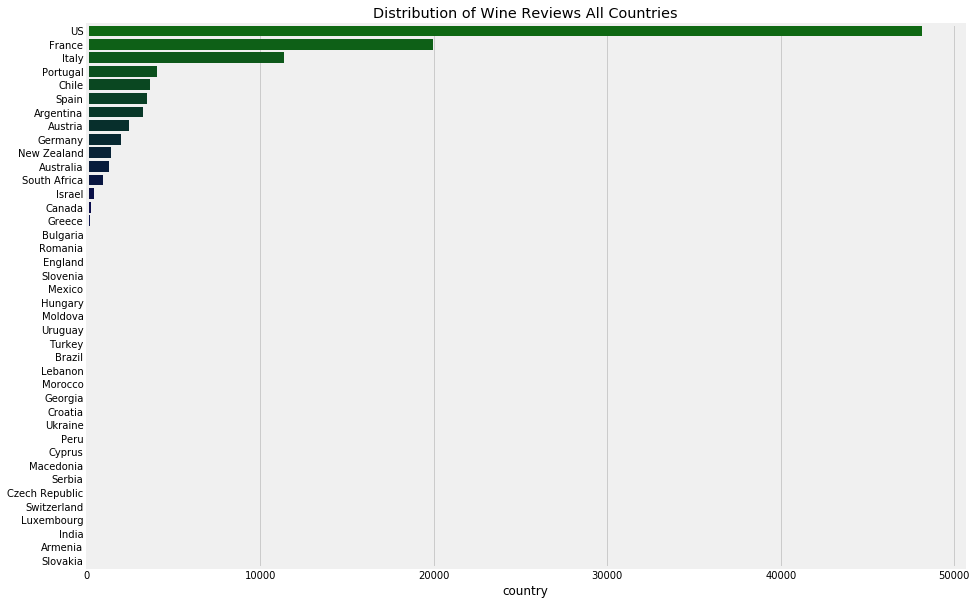

In [10]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews All Countries');

* US Contributes with highest number of wine reviews.
* Number of unique counteries in dataset are 40.

### Distribution of wine price

Text(0.5, 1.0, 'Boxplot of price')

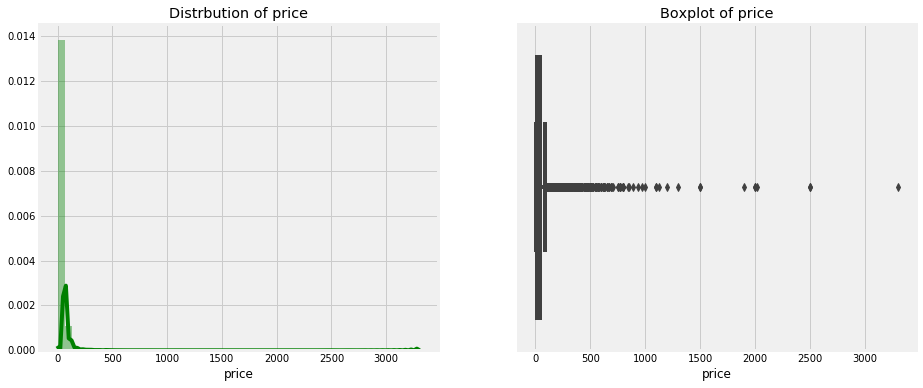

In [11]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color='g',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

* The price of wine starts from 4 and last long to 3300.
* The price mean and median price is less than 100.
* Their are many outliers in the data.

### Country wise average wine price

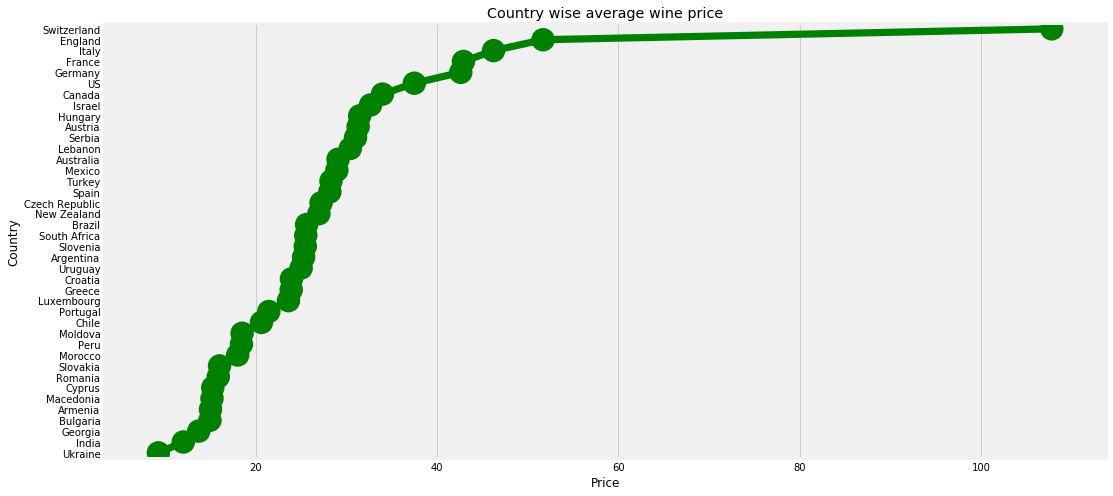

In [12]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='g',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

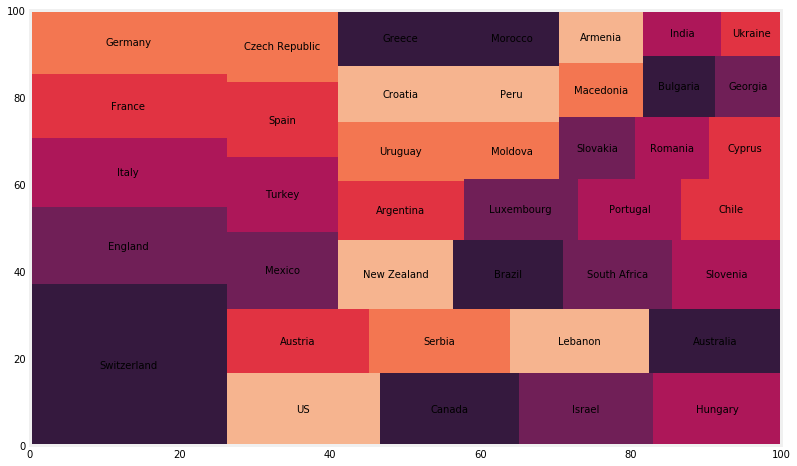

In [12]:
cnt = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rocket'),label=cnt.index)

* 'Switzerland' has highest average wine price.
* 'Ukraine' has lowest avreage wine price followed by 'India'.

### Country wise expensive and cheapest price wine

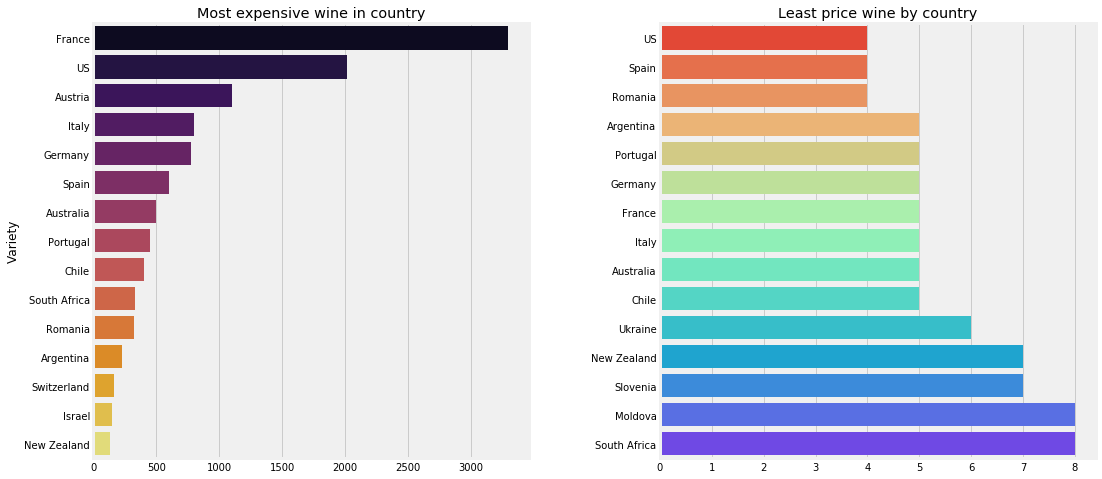

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* The France is selling Expensive wine followed by US.
* The cheapest wine is available at 4 bucks at US, Spain, Romania.
* The most of european countries are selling wide range of wines.

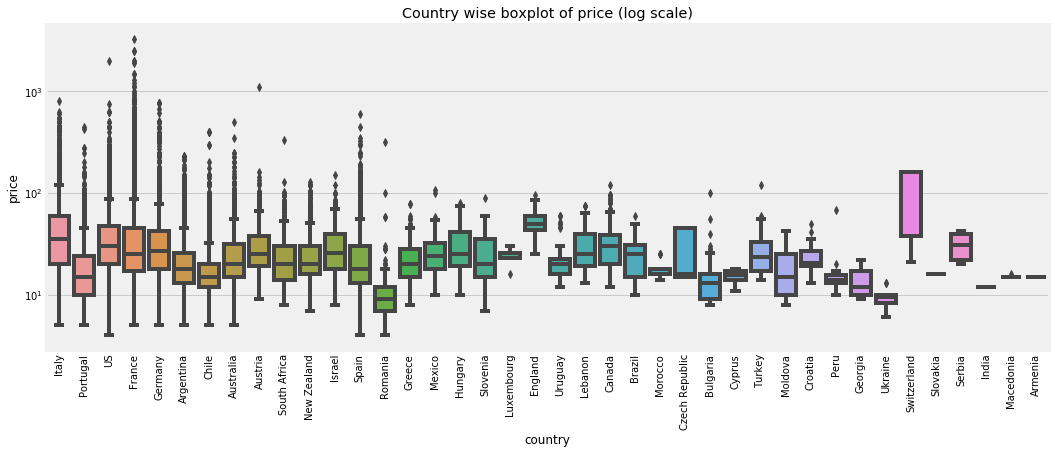

In [14]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log")
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

### Country wise average rating of wine

* The number of points wineenthusiast rated the wine between 1 to 100. But, provided dataset contains post reviews for wine that scores >=80.

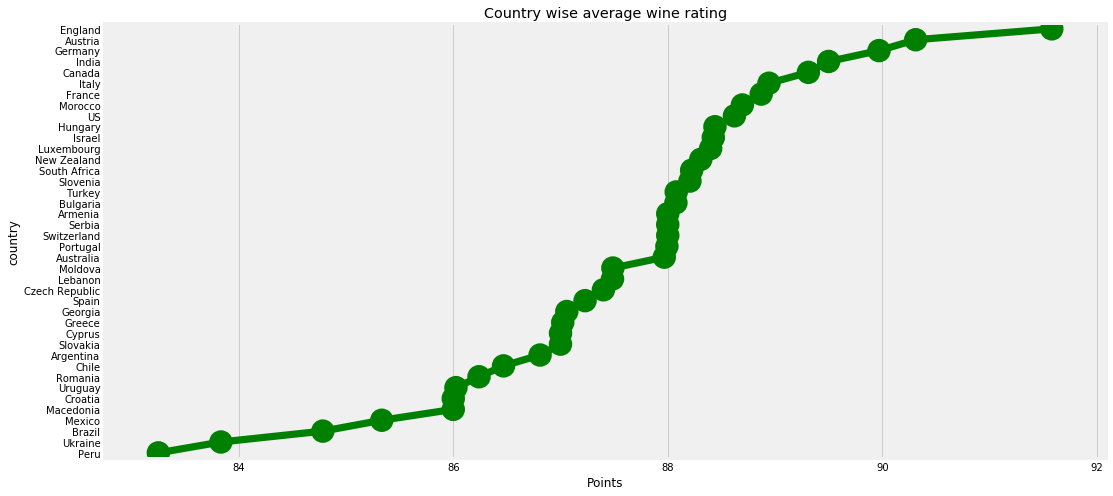

In [13]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='g',orient='h')
plt.title('Country wise average wine rating')
plt.xlabel('Points');

* The average rating of wine for England is highest in the gragh.
* The countries like England, Austria, Germany, India, Canada produces top quality wines in the world.
* The countries like Brazil, Ukraine, Peru produces low quality wines in the world.

### Country wise highest and least rated wine

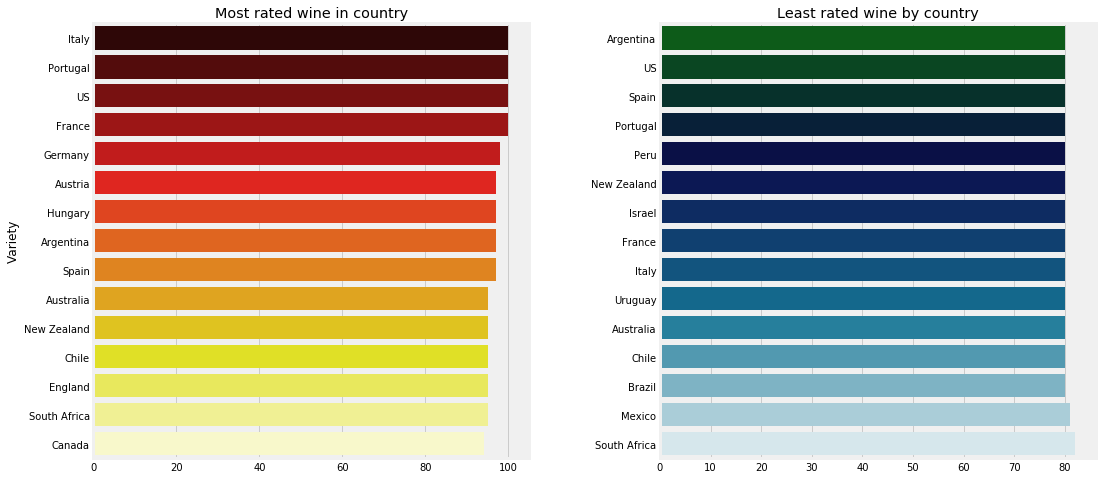

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* The rating of wines varies from 0 to 100 but, least rating is 80.
* The wine produced in Italy, Portugal, US, France receives top rating.
* The wine produced in Argentina, US, Spain, Portugal, Peru receives least rating.

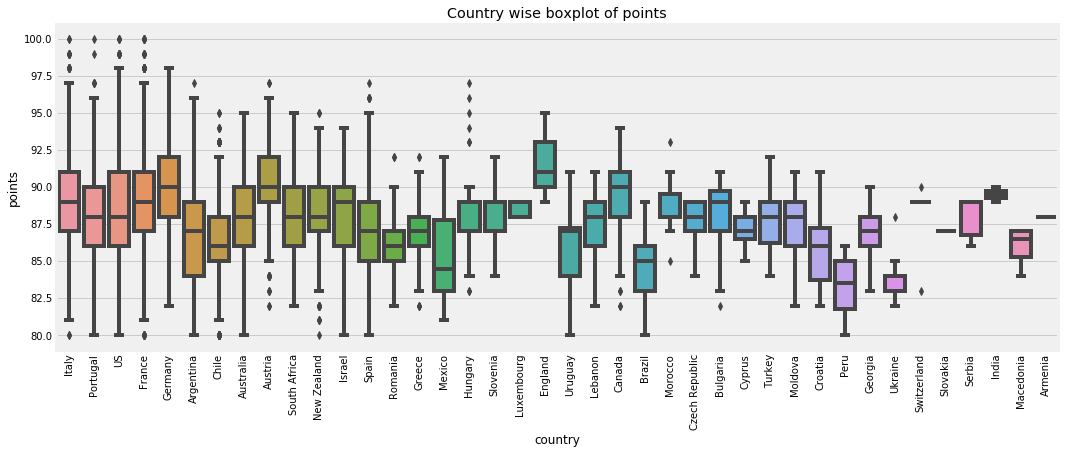

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['points'])
#sns.pointplot(x = wine['country'], y = wine['points'])
plt.title('Country wise boxplot of points')
plt.xticks(rotation=90);

### Relationship between price and points

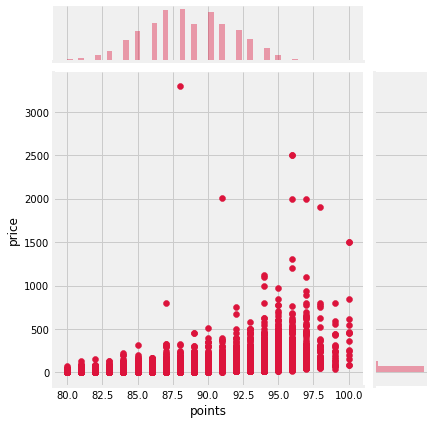

In [18]:
sns.jointplot( x = wine['points'],y = wine['price'],color='crimson');

### Top most wine by variety

* variety - The type of grapes used to make the wine.

Number of variety of wines 28


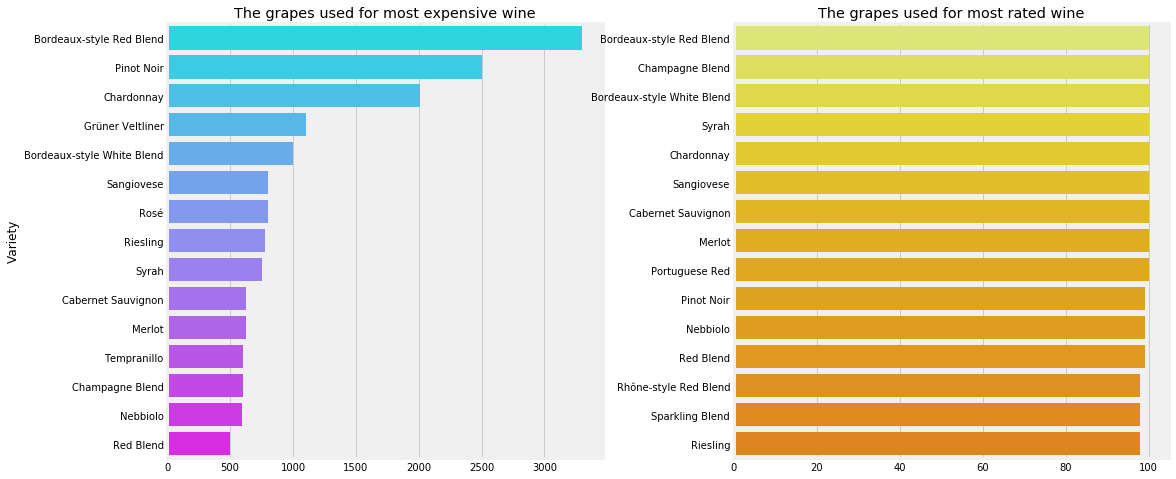

In [14]:
print('Number of variety of wines',wine['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

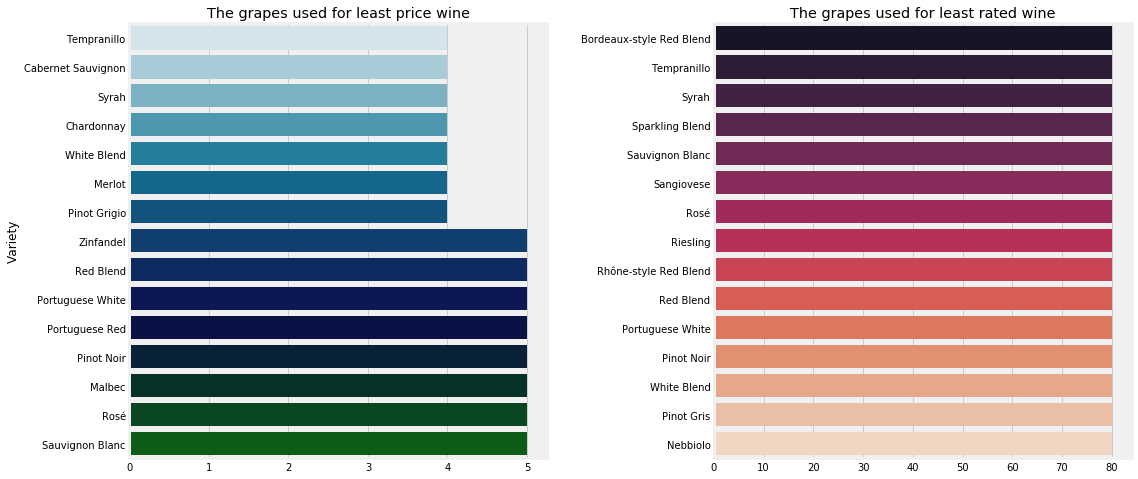

In [20]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index,palette = 'ocean_r',ax=ax1)
ax1.set_title('The grapes used for least price wine')
ax1.set_xlabel('')
ax1.set_ylabel('Variety')

cnt = wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index,palette= 'rocket', ax=ax2)
ax2.set_title('The grapes used for least rated wine')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.subplots_adjust(wspace=0.4);

* The most expensive 'Bordeaux-style Red Blend' has top rated grapes content. Also, the highest rated wine.
* The cheapest 'Tempranillo' has lowest rated grapes content.

In [21]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,8,150,1500,685.375
2,France,99,2,560,800,680
3,Italy,100,2,460,550,505
4,Germany,97,7,245,775,464.714
5,Portugal,100,1,450,450,450
6,France,98,14,70,1900,449.429
7,Portugal,99,1,426,426,426
8,France,97,48,45,2000,375.646
9,Italy,99,8,175,595,331.875


### Designation

* The vineyard within the winery where the grapes that made the wine are from.
* A vineyard is a plantation of grape-bearing vines, grown mainly for winemaking, but also raisins, table grapes and non-alcoholic grape juice. The science, practice and study of vineyard production is known as viticulture.

Number of vineyard designation 30309


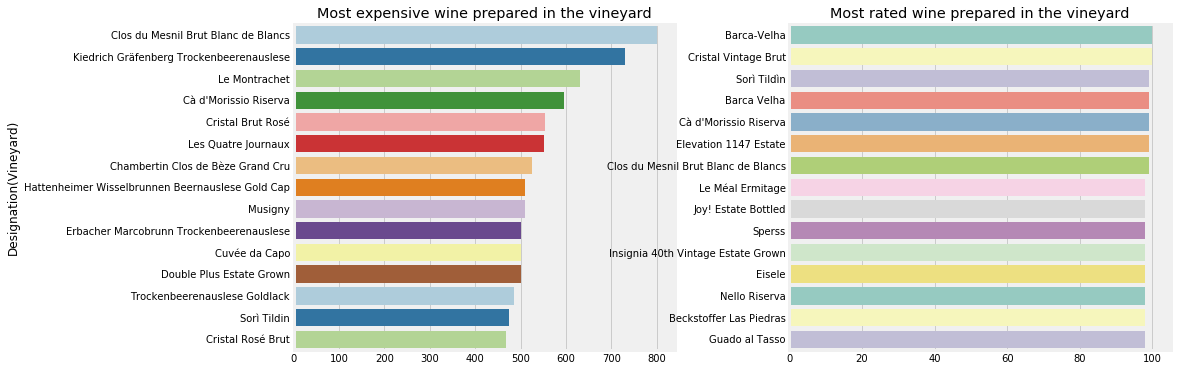

In [22]:
print('Number of vineyard designation',wine['designation'].nunique())
cnt = wine.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation(Vineyard)')
ax1.set_title('Most expensive wine prepared in the vineyard')

cnt = wine.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine prepared in the vineyard')
plt.subplots_adjust(wspace=0.3)

* 'Clos du Mesnil Brut Blanc de Blancs' is the vineyard designation where most expensive wines belongs to.
* 'Barca-Velha' is the vineyard designation where most rated wines belongs to. 

### Winery

* A Winery is a building or property that produces wine, or a business involved in the production of wine, such as a wine company.

Number of winerys: 14728


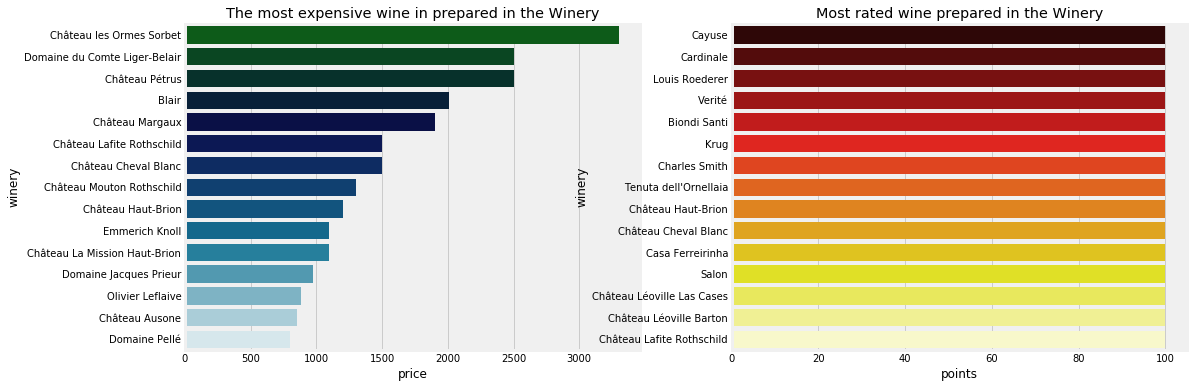

In [23]:
print('Number of winerys:',wine['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in prepared in the Winery')
cnt = wine.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine prepared in the Winery');

* 'ChÃ¢teau les Ormes Sorbet' is the winery where most expensive wine belongs to.
* 'Cayuse' is the winery where top rated wine belongs to.

### Province

* The province or state that the wine is from.

Number of province: 370


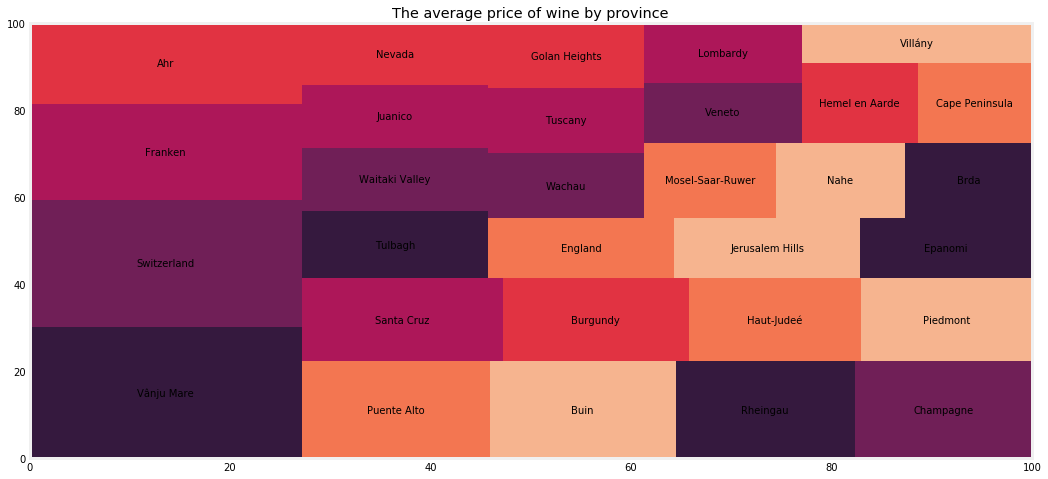

In [24]:
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('rocket'))
plt.title('The average price of wine by province');

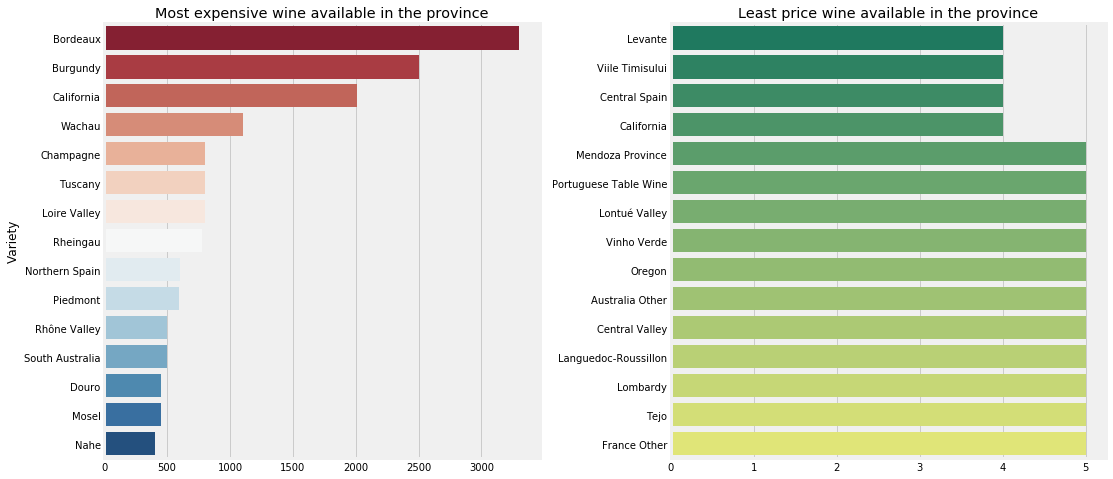

In [4]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine available in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine available in the province')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* 'VÃ¢nju Mare' province has highest average wine price followed by 'Switzerland'.
* 'Bordeaux' Province has most expensive wine and 'Levante' province has least price wine.

In [26]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Bordeaux,France,100,5,150,1500,871.4
1,Champagne,France,99,1,800,800,800
2,Rheingau,Germany,98,1,775,775,775
3,Bordeaux,France,98,6,70,1900,600.333
4,Rheingau,Germany,97,4,445,775,579.5
5,Burgundy,France,99,1,560,560,560
6,Tuscany,Italy,100,2,460,550,505
7,Douro,Portugal,100,1,450,450,450
8,Mosel,Germany,97,1,440,440,440
9,Bordeaux,France,97,22,45,2000,435


### Region_1

* The wine growing area in a province or state

Number of province: 1056


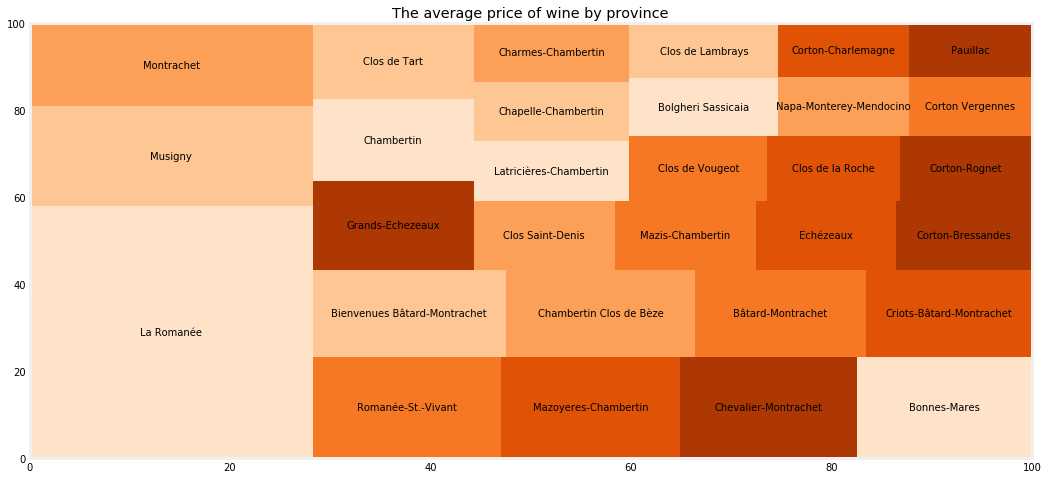

In [27]:
print('Number of province:',wine['region_1'].nunique())
cnt = wine.groupby(['region_1'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Oranges'))
plt.title('The average price of wine by province');

In [28]:
cnt = wine.groupby(['country','province','points','region_1',])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace = True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Burgundy,96,La Romanée,2,2000,2500,2250
1,France,Bordeaux,100,Saint-Émilion,1,1500,1500,1500
2,France,Bordeaux,100,Pauillac,1,1500,1500,1500
3,France,Bordeaux,98,Margaux,2,380,1900,1140
4,France,Burgundy,94,La Romanée,1,1125,1125,1125
5,France,Bordeaux,97,Pomerol,2,130,2000,1065
6,France,Burgundy,95,Musigny,1,973,973,973
7,France,Bordeaux,96,Pomerol,4,250,2500,906.25
8,France,Bordeaux,100,Pessac-Léognan,1,848,848,848
9,France,Champagne,99,Champagne,1,800,800,800


### Region_2

* sometimes there are more specific regions specified within a wine growing area

In [29]:
print('Number of reqion2: ',wine['region_2'].nunique())
print('Null values in reqion2: ',wine['region_2'].isnull().sum())
cnt = wine.groupby(['country','province','region_1','region_2','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

Number of reqion2:  17
Null values in reqion2:  58459


,country,province,region_1,region_2,points,count,min,max,mean
0,US,California,Sonoma County,Sonoma,96,1,450,450,450
1,US,California,Sonoma County,Sonoma,100,1,450,450,450
2,US,California,Sonoma County,Sonoma,97,2,450,450,450
3,US,California,Napa Valley,Napa,98,3,250,625,383.333
4,US,California,Sonoma County,Sonoma,98,1,300,300,300
5,US,California,Stags Leap District,Napa,98,1,265,265,265
6,US,California,Rutherford,Napa,97,1,250,250,250
7,US,California,Green Valley,Sonoma,98,1,250,250,250
8,US,California,Atlas Peak,Napa,99,1,250,250,250
9,US,California,Napa Valley,Napa,99,3,150,300,246.667


In [30]:
cnt = wine.groupby(['country','region_2']).count().reset_index()
cnt['country'].unique()

array(['US'], dtype=object)

* Region 2 details are available only for US

### User-name

* user_name of the reviewer.

           count unique         top   freq
user_name  79191     15  @vossroger  21971


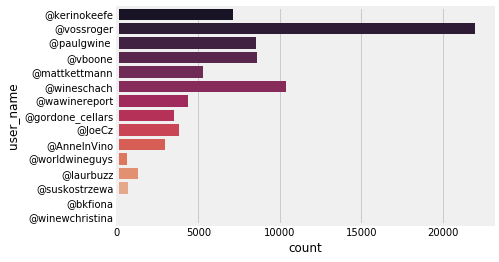

In [10]:
print(wine[['user_name']].describe().T)
sns.countplot(y = wine['user_name'], palette = 'rocket')

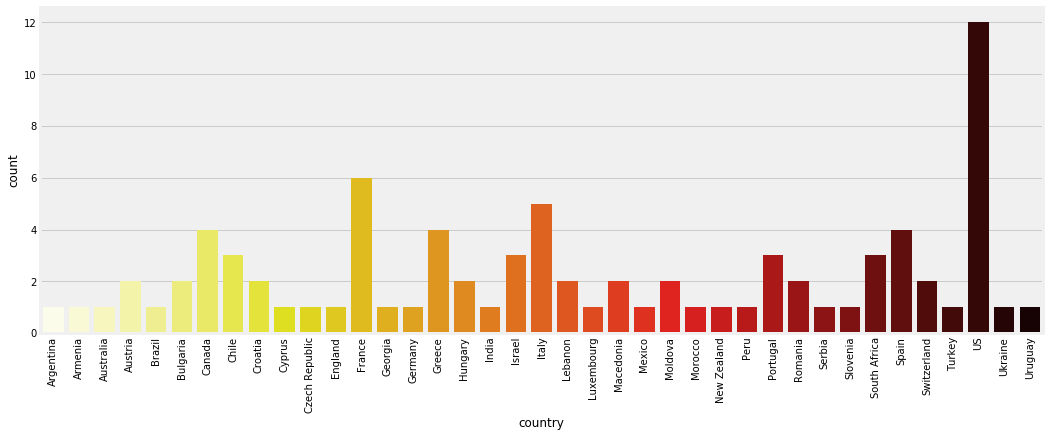

In [32]:
plt.figure(figsize = (16,6))
cnt = wine.groupby(['country','user_name',]).count().reset_index()
sns.countplot(x = cnt['country'], palette='hot_r')
plt.xticks(rotation = 90);

* @vossroger user name has highest count of wine tasting.
* The Country US has highest username count for reviewing.

### Collabrative filtering

* Wine Recommedation system using Nearest Neighbors algorithm.

In [33]:
#Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
#Closer the vectors, smaller will be the angle and larger the cosine

In [34]:
wine1 = wine.copy()

In [35]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [36]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

* Random choice prediction

In [41]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recmmendation for Rosé:

1: Merlot with distance: 0.5965429265668615
2: Chardonnay with distance: 0.6008369423322482
3: White Blend with distance: 0.602634138937185
4: Red Blend with distance: 0.6129213730641945
5: Pinot Gris with distance: 0.6344209177730347


* Custom Choice prediction

In [40]:
# Specify the desired wine variety
desired_variety = "Portuguese Red"

# Find the index of the desired wine variety in the wine_pivot DataFrame
query_index = wine_pivot.index.get_loc(desired_variety)

# Perform the nearest neighbors search
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

# Print the recommendations
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i, wine_pivot.index[indice.flatten()[i]], distance.flatten()[i]))


Recommendations for Portuguese Red:

1: Portuguese White with distance: 0.38934914086245087
2: Rhône-style Red Blend with distance: 0.8605708679403368
3: Syrah with distance: 0.8809742889127262
4: Rosé with distance: 0.896260555867149
5: Pinot Noir with distance: 0.9142166118922748
